In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
data = np.array(data)

In [5]:
data[3][0]

4

In [18]:
pic1 = data[0,1:]

In [7]:
pic1.shape

(784,)

In [10]:
max(pic1)

255

In [22]:
pic1 = pic1.reshape((28,-1))

In [23]:
pic1.shape

(28, 28)

In [20]:
pic1 = pic1/255

In [21]:
max(pic1)

1.0

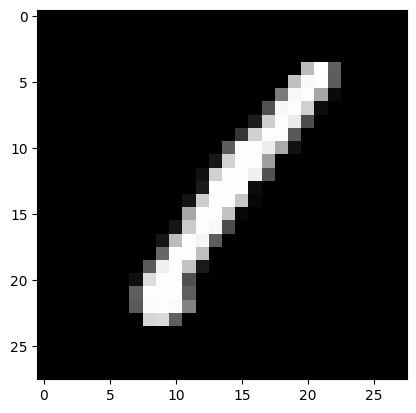

In [24]:
plt.imshow(pic1, cmap='gray')

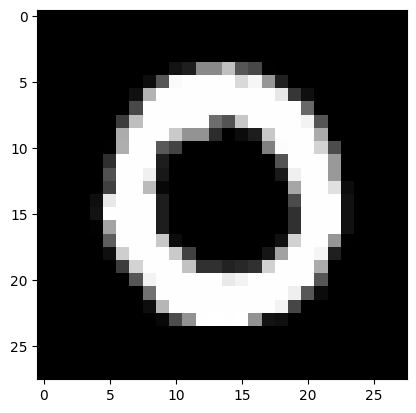

In [71]:
#img2
plt.imshow(data[1,1:].reshape((28,-1)), cmap='gray')

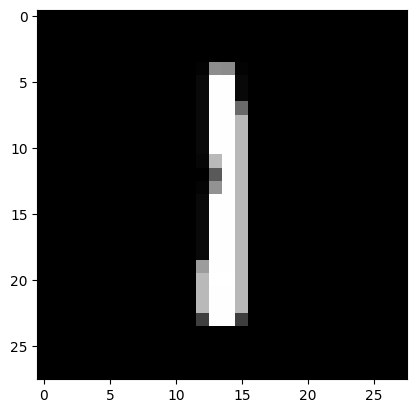

In [72]:
plt.imshow(data[2,1:].reshape((28,-1)), cmap='gray')

In [73]:
m, n = data.shape

In [74]:
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [75]:
X_train.shape

(784, 41000)

In [76]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    
    return W1, b1, W2, b2


In [77]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    
    return W1, b1, W2, b2

In [78]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[1 1 2 ... 1 2 1] [8 0 2 ... 6 1 2]
Accuracy:  0.055878048780487806
Iteration:  50
[1 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.45519512195121953
Iteration:  100
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.596
Iteration:  150
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.6707317073170732
Iteration:  200
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.722609756097561
Iteration:  250
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.7565365853658537
Iteration:  300
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.7797317073170732
Iteration:  350
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.7953902439024391
Iteration:  400
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.8071951219512196
Iteration:  450
[8 0 2 ... 6 1 2] [8 0 2 ... 6 1 2]
Accuracy:  0.8172195121951219


In [1]:
import tensorflow as tf

tf.test.gpu_device_name()

''